## Q1. What is the mathematical formula for a linear SVM?

The mathematical formula for a linear Support Vector Machine (SVM) can be represented as follows:

Given a set of training data points \(x_i\) with corresponding labels \(y_i\) (where \(y_i\) can be either -1 or 1), the objective of a linear SVM is to find a hyperplane with parameters \(w\) (weights) and \(b\) (bias) such that it maximally separates the data points of different classes while minimizing the classification error. The decision function for a linear SVM is given by:

f(x)=sign(⟨w,x⟩+b)

Here:
f(x) is the decision function that predicts the class of a new data point x.
⟨w,x⟩ represents the dot product of the weight vector w and the input vector x.
sign(⋅) is the sign function, returning +1 if its argument is positive, -1 if negative, and 0 if the argument is zero

The parameters \(w\) and \(b\) are learned during the training process, and the optimization problem involves finding the values that maximize the margin between the two classes while satisfying certain constraints. The formulation often involves minimizing the norm of the weight vector (\(||w||\)) subject to the constraint that the data points are correctly classified within a margin. This leads to a convex optimization problem, typically solved using techniques such as quadratic programming.

## Q2. What is the objective function of a linear SVM?

The objective function of a linear Support Vector Machine (SVM) is designed to maximize the margin between the two classes while minimizing the classification error. The typical formulation involves the minimization of the norm of the weight vector
(∣∣w∣∣) subject to the constraint that each data point is correctly classified and lies on the correct side of the decision boundary. This is a convex optimization problem.

The standard formulation of the objective function for a linear SVM is given as follows:
Minimize  1/2 ||w||**2



## Q3. What is the kernel trick in SVM?

## Q4. What is the role of support vectors in SVM Explain with example

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

In [3]:
pip install numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


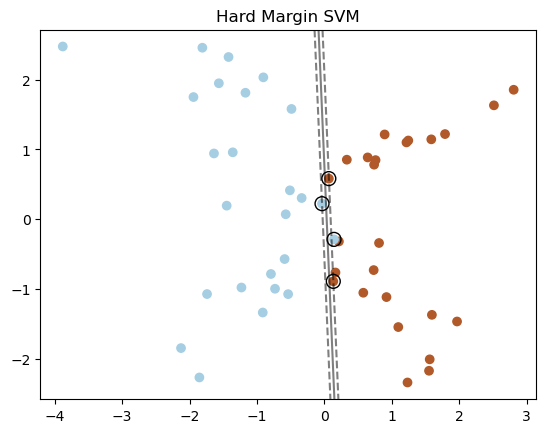

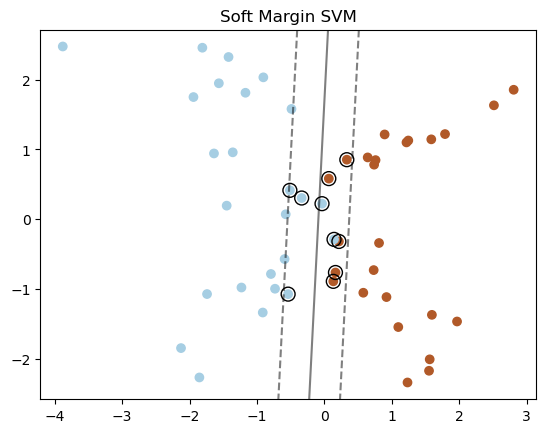

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Create a simple dataset with two classes
X, y = datasets.make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit an SVM with a linear kernel (Hard Margin)
clf_hard_margin = svm.SVC(kernel='linear', C=1e6)  # Use a large value for C
clf_hard_margin.fit(X, y)

# Fit an SVM with a linear kernel and a Soft Margin
clf_soft_margin = svm.SVC(kernel='linear', C=1.0)  # C is the regularization parameter
clf_soft_margin.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot decision boundaries and margins for Hard Margin
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf_hard_margin.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
plt.scatter(clf_hard_margin.support_vectors_[:, 0], clf_hard_margin.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title('Hard Margin SVM')
plt.show()

# Plot decision boundaries and margins for Soft Margin
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Create grid to evaluate model
Z = clf_soft_margin.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
plt.scatter(clf_soft_margin.support_vectors_[:, 0], clf_soft_margin.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title('Soft Margin SVM')
plt.show()


## Q6. SVM Implementation through Iris dataset.

- Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
- Train a linear SVM classifier on the training set and predict the labels for the testing setl
- Compute the accuracy of the model on the testing setl
- Plot the decision boundaries of the trained model using two of the featuresl
- Try different values of the regularisation parameter C and see how it affects the performance of the model.

Accuracy: 0.90


/tmp/ipykernel_2748/97125261.py:43: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', marker='x', s=80, label='Test')


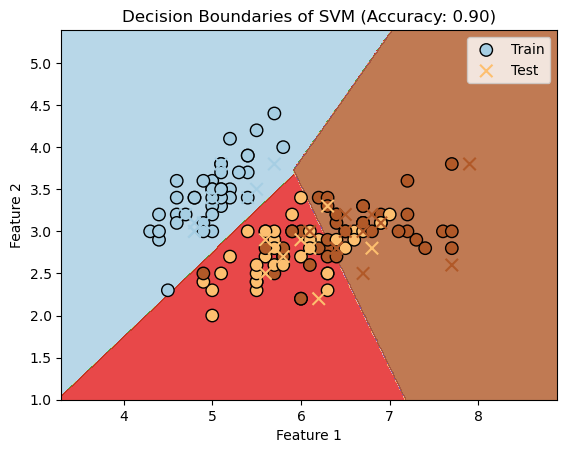

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier on the training set
clf = SVC(kernel='linear', C=1.0)  # You can experiment with different values of C
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the decision boundaries using two features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=80, label='Train')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', marker='x', s=80, label='Test')

plt.title(f'Decision Boundaries of SVM (Accuracy: {accuracy:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
